<a href="https://colab.research.google.com/github/sonia1313/Face-Emotion-Recognition-Project/blob/main/train_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Face-Emotion-Recognition-Project' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.gitignore', 'LICENSE', 'README.md', 'src', 'models', 'personal_dataset', '.git', '.vscode', '__pycache__', 'CW_Dataset', 'test_function.ipynb', 'train_function.ipynb']


In [3]:
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'models')
sys.path.append(CODE_PATH)

In [4]:
zip_path = os.path.join(GOOGLE_DRIVE_PATH,'CW_Dataset/CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

In [5]:
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'src')
sys.path.append(CODE_PATH)

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from data_loader import import_selected_data
from collections import  Counter
import numpy as np

In [8]:
X_train,y_train = import_selected_data('train')
X_test, y_test = import_selected_data('test')

In [9]:
n_samples, x,y,z = X_train.shape
print(n_samples)
print(x)
print(y)
print(z)

12271
100
100
3


In [10]:
# X_train = X_train.reshape((n_samples,x*y))
# X_train.shape

In [11]:
Counter(y_train)

Counter({1: 1290, 2: 281, 3: 717, 4: 4772, 5: 1982, 6: 705, 7: 2524})

1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral

In [12]:
Counter(y_test)

Counter({1: 329, 2: 74, 3: 160, 4: 1185, 5: 478, 6: 162, 7: 680})

preproccessing : http://rstudio-pubs-static.s3.amazonaws.com/454441_79ebb625c3ee47a18f88c61490f43c22.html

https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-cross-validation-and-hyperparameter-tuning-using-gridsearch

https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/

Making data more balanced by using ADASYN
https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167

https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/

https://scipy-lectures.org/packages/scikit-learn/index.html

In [13]:
X_train = X_train.reshape(n_samples,-1)

In [14]:
X_train.shape

(12271, 30000)

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from skimage import io, color, img_as_float, img_as_ubyte


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
def smote_balance_dataset(X,y, strategy = {2:1000, 3:1000, 6:1000} ):
    #con
    #strategy = {2:1000, 3:1000, 6:1000}
    #X = X.reshape(-1, 100 * 100)
    over = SMOTE(sampling_strategy = strategy)
    sampledX, sampledY = over.fit_sample(X,y)
    return sampledX, sampledY

In [17]:
def balance_dataset_undersampling(X,y, strategy = { 4:1000, 5: 1000, 7:1000}):
    #X = X.reshape(-1, 100 * 100)
    under = RandomUnderSampler(sampling_strategy = strategy)
    sampledX, sampledY = under.fit_sample(X,y)
    return sampledX, sampledY

In [18]:
X_train_sampled, y_train_sampled  = smote_balance_dataset(X_train,y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
X_train_sampled, y_train_sampled  = balance_dataset_undersampling(X_train_sampled,y_train_sampled )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
Counter(y_train_sampled)

Counter({1: 1290, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000})

In [21]:
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 49.5MB 88kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [22]:
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline

In [23]:
cv2.__version__

'4.4.0'

In [24]:
X_train_sampled[0].dtype

dtype('uint8')

In [25]:
X_train_img = X_train_sampled.reshape(-1, 100, 100,3)
X_train_img.shape

(7290, 100, 100, 3)

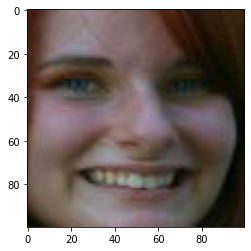

In [26]:
    img = X_train_img[4000]
    plt.imshow(img)

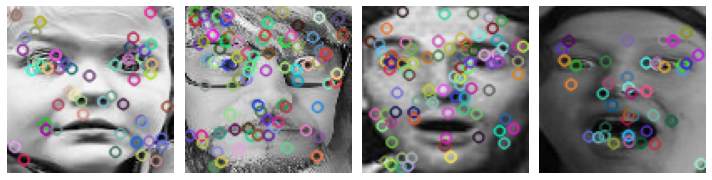

In [27]:

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Create empty lists for feature descriptors and labels
des_list = []
y_train_list = []

fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

for i in range(len(X_train_img)):
    # Identify keypoints and extract descriptors with SIFT
    img = img_as_ubyte(color.rgb2gray(X_train_img[i]))
    kp, des = sift.detectAndCompute(img, None)

    # Show results for first 4 images
    if i<4:
        img_with_SIFT = cv2.drawKeypoints(img, kp, img)
        ax[i].imshow(img_with_SIFT)
        ax[i].set_axis_off()

    # Append list of descriptors and label to respective lists
    if des is not None:
        des_list.append(des)
        y_train_list.append(y_train[i])

fig.tight_layout()
plt.show()

# Convert to array for easier handling
des_array = np.vstack(des_list)

In [28]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV

In [29]:
len(np.unique(y_train_sampled))

7

In [31]:
import scipy


In [32]:
# Number of centroids/codewords: good rule of thumb is 10*num_classes
k = len(np.unique(y_train_sampled)) * 10

# Use MiniBatchKMeans for faster computation and lower memory usage
batch_size = des_array.shape[0] // 4
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size).fit(des_array)

In [33]:
# Convert descriptors into histograms of codewords for each image
hist_list = []
idx_list = []

for des in des_list:
    hist = np.zeros(k)

    idx = kmeans.predict(des)
    idx_list.append(idx)
    for j in idx:
        hist[j] = hist[j] + (1 / len(des))
    hist_list.append(hist)
  
idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
hist_list = [hist_list[i] for i in idx_not_empty]
y_train_sampled = [y_train_sampled[i] for i in idx_not_empty]
hist_array = np.vstack(hist_list)

In [34]:
len(hist_array)

7286

In [65]:
len(y_train_sampled)

7286

In [36]:
params_SVM = {
    "C": scipy.stats.expon(scale=.01),
    "gamma": scipy.stats.expon(scale=.01),
    "kernel": ["rbf", "poly", "linear"],
    "random_state": [1]
}

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=1)


# gs_SVM = GridSearchCV(estimator=svm.SVC(), 
#                       param_grid=params_SVM, 
#                       cv=cv_method,
#                       verbose=1,  # verbose: the higher, the more messages
#                       scoring='accuracy', 
#                       return_train_score=True)

rs_SVM = RandomizedSearchCV(estimator=svm.SVC(), 
                      param_distributions=params_SVM, 
                      cv=10,
                      verbose=0,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True, n_iter = 10)

In [37]:
rs_SVM.fit(hist_array,y_train_sampled)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c81c00850>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c81c00a10>,
                                        'kernel': ['rbf', 'poly', 'linear'],
                                        'random_state': [1]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
           

In [38]:
rs_SVM.best_params_

{'C': 0.007862289435636159,
 'gamma': 0.011494472392024316,
 'kernel': 'linear',
 'random_state': 1}

In [39]:
rs_SVM.best_score_

0.17705196038529372

In [41]:
rs_SVM.best_estimator_

SVC(C=0.007862289435636159, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.011494472392024316, kernel='linear', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [42]:
def get_feature_descriptor(X_test, y_test):
  hist_list = []

  for i in range(len(X_test)):
      img = img_as_ubyte(color.rgb2gray(X_test[i]))
      kp, des = sift.detectAndCompute(img, None)

      if des is not None:
          hist = np.zeros(k)

          idx = kmeans.predict(des)

          for j in idx:
              hist[j] = hist[j] + (1 / len(des))

          # hist = scale.transform(hist.reshape(1, -1))
          hist_list.append(hist)

      else:
          hist_list.append(None)
      #print(len(hist_list))
  # Remove potential cases of images with no descriptors
  idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
  hist_list = [hist_list[i] for i in idx_not_empty]
  y_test = [y_test[i] for i in idx_not_empty]
  hist_array = np.vstack(hist_list)
  return hist_array, y_test

In [43]:
X_test, y_test = import_selected_data('test')

In [44]:
print(len(X_test))

3068


In [45]:
print(len(y_test))

3068


In [46]:
hist_array, y_test = get_feature_descriptor(X_test, y_test)

In [50]:
# Create a classifier: a support vector classifier
classifier = rs_SVM.best_estimator_

# We learn the digits on the first half of the digits
#classifier.fit(hist_array, y_train_list)

In [51]:
print(len(hist_array))

3066


In [52]:
predicted = classifier.predict(hist_array).tolist()

In [53]:
len(predicted)

3066

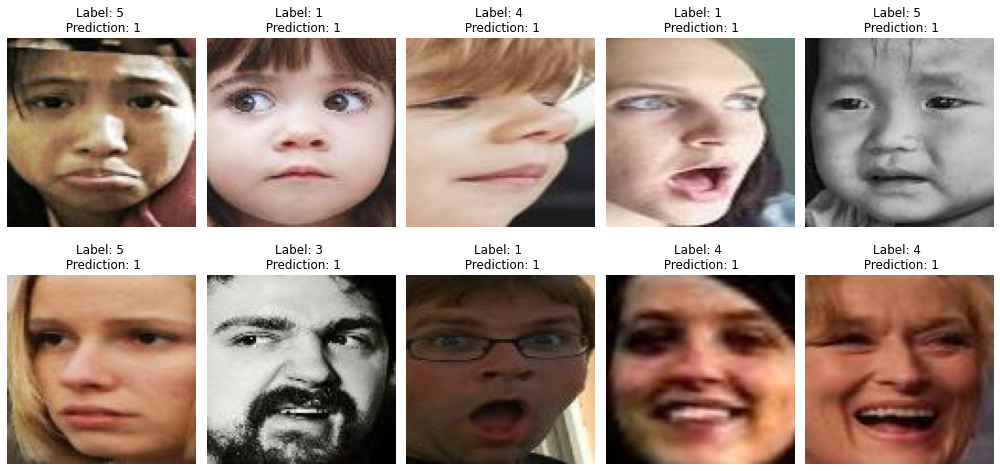

In [54]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f'Label: {y_test[i]} \n Prediction: {predicted[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [55]:
print(f"""Classification report for classifier {classifier}:
      {metrics.classification_report(y_test, predicted)}\n""")

Classification report for classifier SVC(C=0.007862289435636159, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.011494472392024316, kernel='linear', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False):
                    precision    recall  f1-score   support

           1       0.11      1.00      0.19       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.00      0.00      0.00      1184
           5       0.00      0.00      0.00       478
           6       0.00      0.00      0.00       162
           7       0.00      0.00      0.00       679

    accuracy                           0.11      3066
   macro avg       0.02      0.14      0.03      3066
weighted avg       0.01      0.11      0.02      3066




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(metrics.classification_report(list(y_test), list(predicted)))


              precision    recall  f1-score   support

           1       0.11      1.00      0.19       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.00      0.00      0.00      1184
           5       0.00      0.00      0.00       478
           6       0.00      0.00      0.00       162
           7       0.00      0.00      0.00       679

    accuracy                           0.11      3066
   macro avg       0.02      0.14      0.03      3066
weighted avg       0.01      0.11      0.02      3066



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [74]:
X_test.shape

(3068, 100, 100, 3)

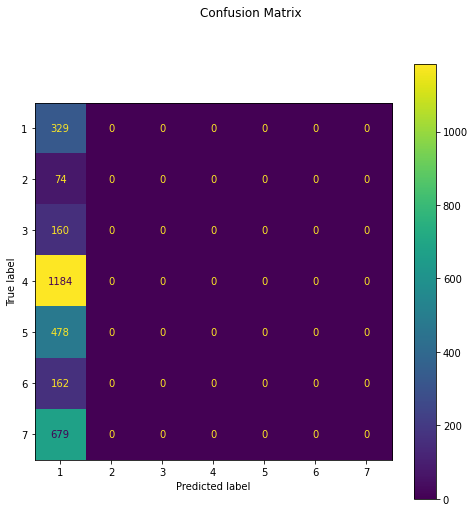

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(classifier, list(hist_array),list( y_test), values_format = 'd', ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

have to fix color images
have to fixx normalisation
have to fix hyper parameter tuning 